Imports

In [1]:
import numpy as np
import os
from plotting import plot_sample_efficiency_curve, COLOR_MAPPING, LABEL_MAPPING, load_and_process_experiment_data, arange_frames

Load data

In [2]:
envs = [
    "emm",
    "emp",
    "ess"
]

run_ids = [
    "gru",
    "trxl",
    "gru_rec",
    "trxl_rec"
]

skip = 1

# Loop over all possible paths and load data
raw_data_dict = {}
for env in envs:
    raw_data_dict[env] = {}
    for run_id in run_ids:
        path = f"./results/{env}/{run_id}/"
        if os.path.exists(path) and os.path.isdir(path):
            data = load_and_process_experiment_data(path, "length")
            # Average over the episodes dimension
            data = data.mean(axis=2)
            raw_data_dict[env][run_id] = data[::skip]
        else:
            continue


['./results/emm/gru/novel_0.res', './results/emm/gru/novel_1.res', './results/emm/gru/novel_2.res', './results/emm/gru/novel_3.res', './results/emm/gru/novel_4.res']
['./results/emm/trxl/novel_0.res', './results/emm/trxl/novel_1.res', './results/emm/trxl/novel_2.res', './results/emm/trxl/novel_3.res', './results/emm/trxl/novel_4.res']
['./results/emm/trxl_rec/novel_0.res', './results/emm/trxl_rec/novel_1.res', './results/emm/trxl_rec/novel_2.res', './results/emm/trxl_rec/novel_3.res', './results/emm/trxl_rec/novel_4.res']
['./results/emp/gru/novel_0.res', './results/emp/gru/novel_1.res', './results/emp/gru/novel_2.res', './results/emp/gru/novel_3.res', './results/emp/gru/novel_4.res']
['./results/emp/trxl/novel_0.res', './results/emp/trxl/novel_1.res', './results/emp/trxl/novel_2.res', './results/emp/trxl/novel_3.res', './results/emp/trxl/novel_4.res']
['./results/ess/gru_rec/novel_0.res', './results/ess/gru_rec/novel_1.res', './results/ess/gru_rec/novel_2.res', './results/ess/gru_rec/

Process and aggregate data

(101, 5, 150)

101 Checkpoints
5 Runs
150 Episodes

In [3]:
# Aggregate data
mean_dict = {}
std_dict = {}
min_dict = {}
max_dict = {}
for env in raw_data_dict:
    mean_dict[env] = {}
    std_dict[env] = {}
    min_dict[env] = {}
    max_dict[env] = {}
    for run_id in raw_data_dict[env]:
        mean_dict[env][run_id] = raw_data_dict[env][run_id].mean(axis=1)
        std_dict[env][run_id] = raw_data_dict[env][run_id].std(axis=1)
        min_dict[env][run_id] = raw_data_dict[env][run_id].min(axis=1)
        max_dict[env][run_id] = raw_data_dict[env][run_id].max(axis=1) 

# Setup frames
frames = arange_frames(mean_dict["emm"]["gru"].shape[0], skip)

Plot mean and std across runs

EMM

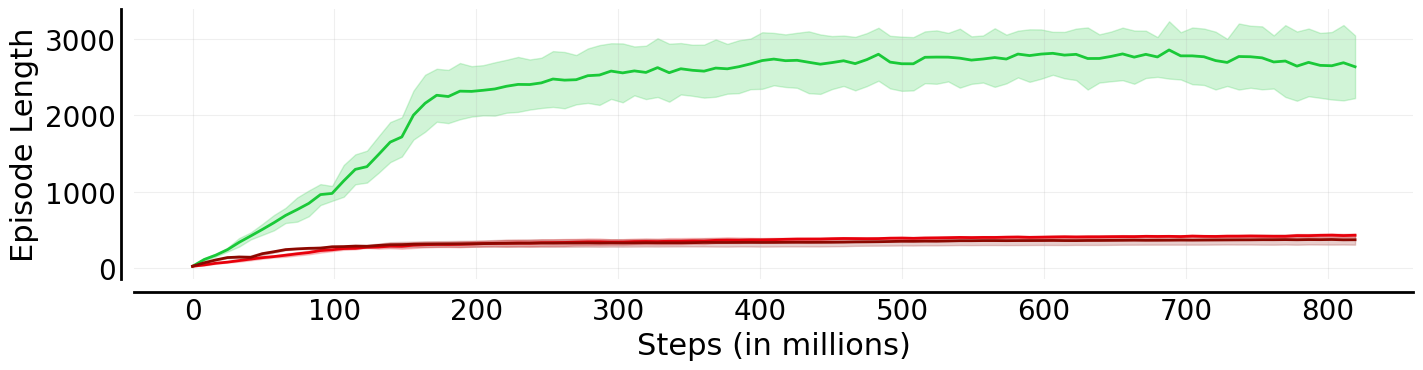

In [4]:
plot_sample_efficiency_curve(frames,
                             mean_dict["emm"],
                             std_dict["emm"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")

In [5]:
mean_dict["emm"]["trxl"].max()

430.6666666666667

Plot mean and std across runs

EMP

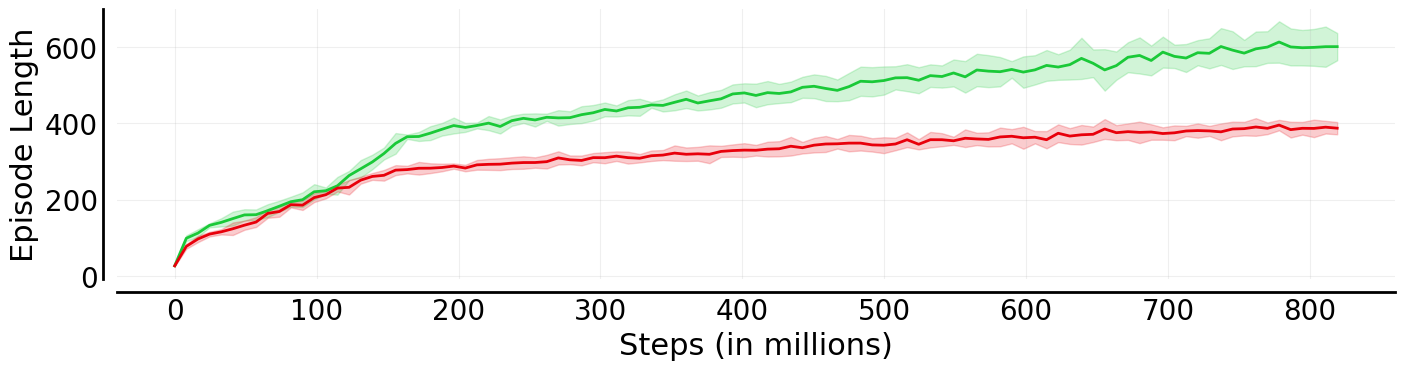

In [6]:
plot_sample_efficiency_curve(frames,
                             mean_dict["emp"],
                             std_dict["emp"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")

Plot mean and std across runs

ESS

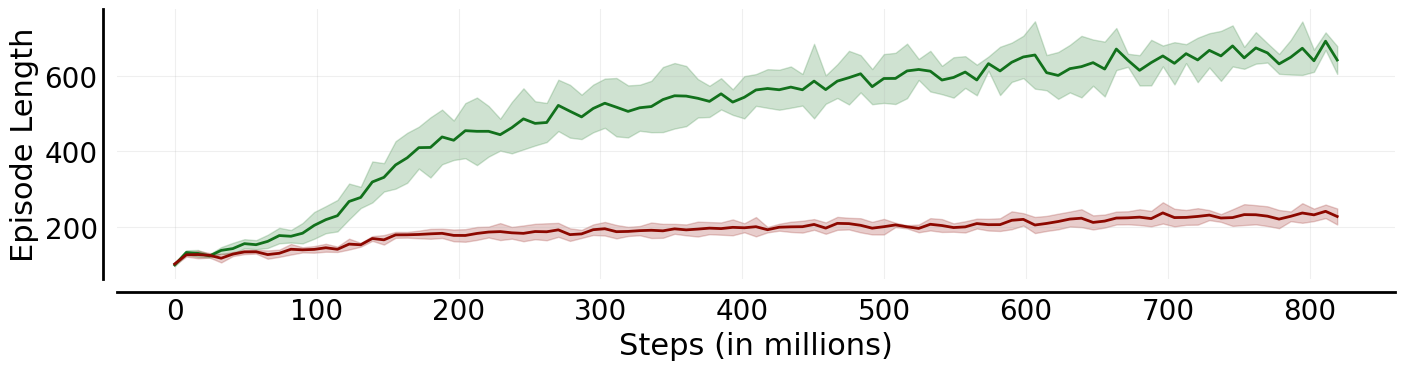

In [7]:
plot_sample_efficiency_curve(frames,
                             mean_dict["ess"],
                             std_dict["ess"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")

In [8]:
mean_dict["ess"]["gru_rec"].max()

691.168

Plot individual mean

EMM

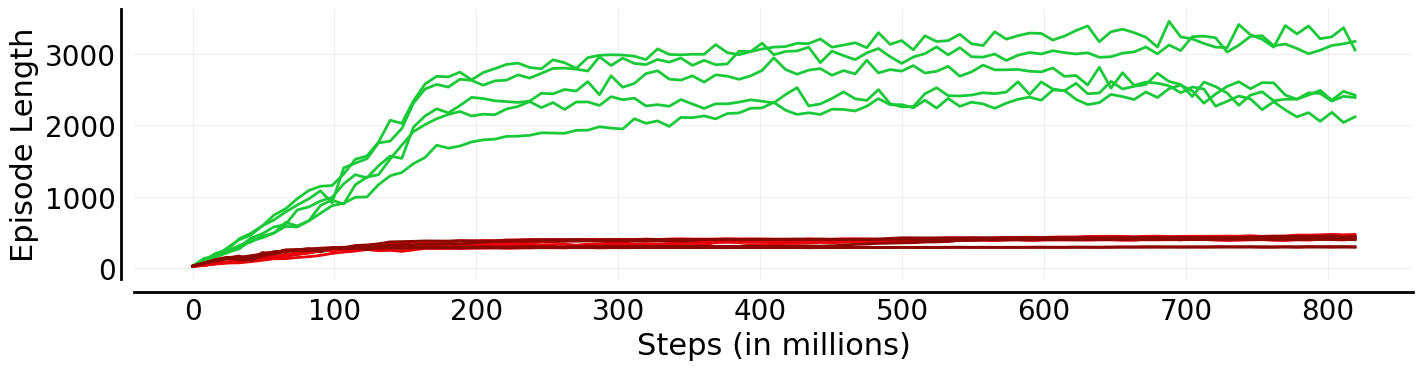

In [9]:
plot_sample_efficiency_curve(frames,
                             raw_data_dict["emm"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")

Plot individual mean

EMP

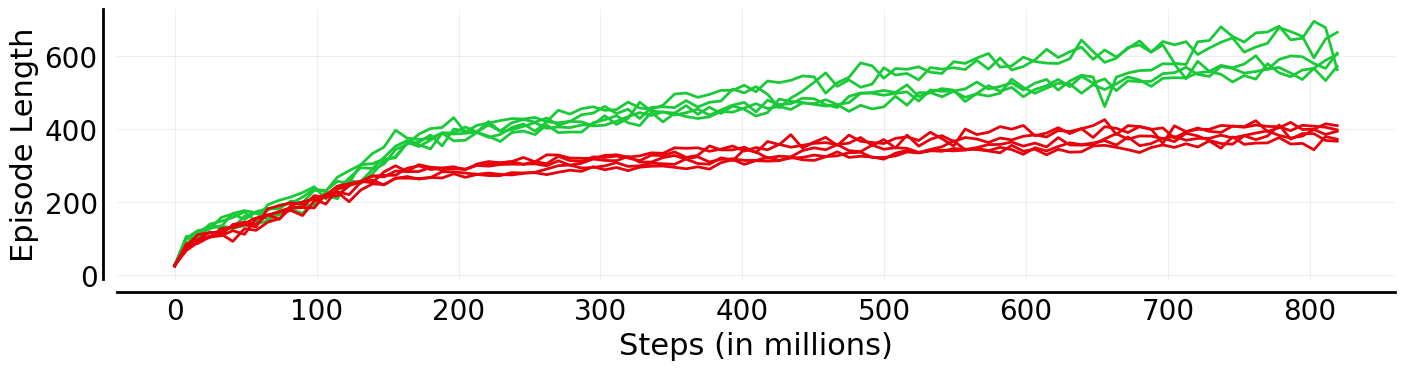

In [10]:
plot_sample_efficiency_curve(frames,
                             raw_data_dict["emp"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")

In [11]:
raw_data_dict["emp"]["trxl"][-1].mean()

387.3306666666667

Plot individual mean

ESS

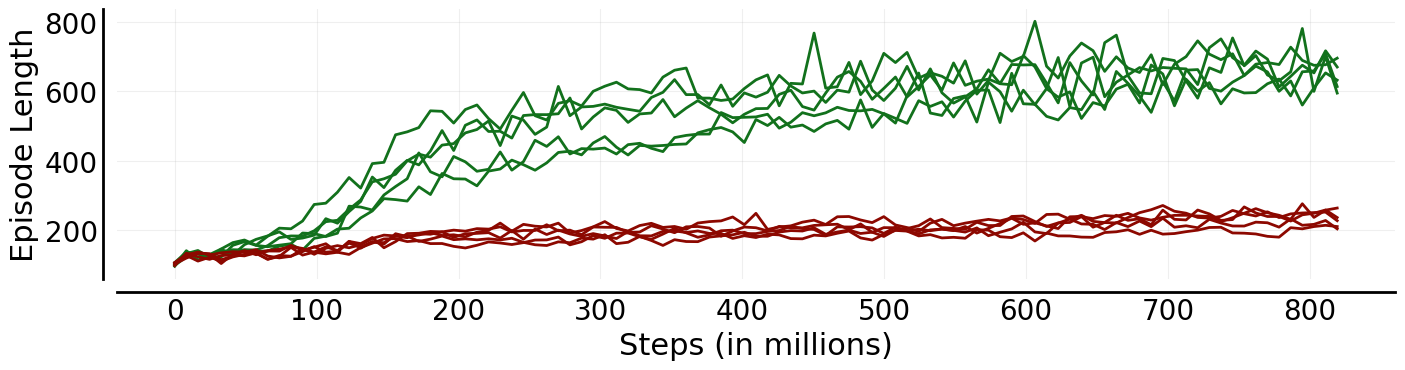

In [12]:
plot_sample_efficiency_curve(frames,
                             raw_data_dict["ess"],
                             colors=COLOR_MAPPING,
                             label_mapping=LABEL_MAPPING,
                             figsize=(16.5,3.5),
                             xticks=list(range(0, 820, 100)),
                             xlabel="Steps (in millions)",
                             ylabel="Episode Length",
                             marker="")